In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
os.listdir(r'C:\Users\jacob\Desktop\Deep Learning Models\Melanoma Classification\Data')

['Benign', 'Malignant']

In [4]:
import cv2
import imghdr

C:\Users\jacob\AppData\Local\Temp\ipykernel_3704\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = r'C:\Users\jacob\Desktop\Deep Learning Models\Melanoma Classification\Data'

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Data Pipeline

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 11879 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
batch[0].shape

(32, 256, 256, 3)

In [13]:
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

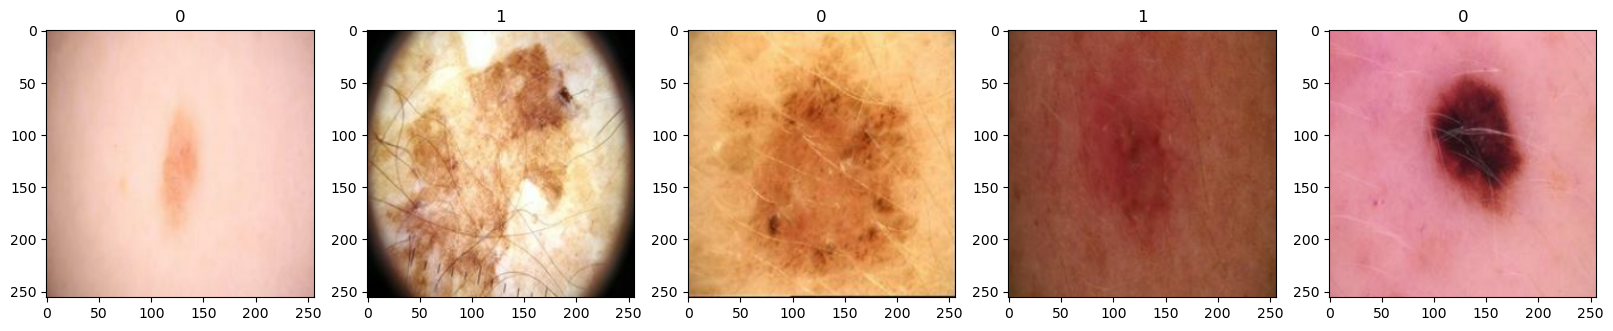

In [14]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [46]:
data.as_numpy_iterator().next()

(array([[[[0.88235295, 0.61960787, 0.6862745 ],
          [0.88235295, 0.61960787, 0.6862745 ],
          [0.88235295, 0.61960787, 0.6862745 ],
          ...,
          [0.74019605, 0.52843136, 0.57941175],
          [0.7272059 , 0.5154412 , 0.56642157],
          [0.7176471 , 0.5058824 , 0.5568628 ]],
 
         [[0.88235295, 0.61960787, 0.6862745 ],
          [0.8849418 , 0.6221967 , 0.68886334],
          [0.88772976, 0.6249847 , 0.69165134],
          ...,
          [0.74019605, 0.52843136, 0.57941175],
          [0.72660846, 0.51484376, 0.56582415],
          [0.7144608 , 0.5026961 , 0.5536765 ]],
 
         [[0.88235295, 0.61960787, 0.6862745 ],
          [0.88992035, 0.6271753 , 0.69384193],
          [0.89436275, 0.63161767, 0.6982843 ],
          ...,
          [0.73935354, 0.52758884, 0.57856923],
          [0.72428   , 0.5125153 , 0.5634957 ],
          [0.7137255 , 0.5019608 , 0.5529412 ]],
 
         ...,
 
         [[0.7242647 , 0.52818626, 0.5375    ],
          [0.72745

In [19]:
len(data)

372

In [20]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
len(train)

260

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras import regularizers

In [129]:
model = Sequential()

In [130]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [131]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [132]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 30, 30, 16)      

In [133]:
logdir = r'C:\Users\jacob\Desktop\Deep Learning Models\Melanoma Classification\Logs'

In [134]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [135]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
260/260 [==============================] - 50s 187ms/step - loss: 0.4742 - accuracy: 0.7688 - val_loss: 0.3921 - val_accuracy: 0.8243
Epoch 2/10
260/260 [==============================] - 49s 187ms/step - loss: 0.3809 - accuracy: 0.8305 - val_loss: 0.3900 - val_accuracy: 0.8277
Epoch 3/10
260/260 [==============================] - 49s 187ms/step - loss: 0.3625 - accuracy: 0.8405 - val_loss: 0.3323 - val_accuracy: 0.8459
Epoch 4/10
260/260 [==============================] - 49s 186ms/step - loss: 0.3478 - accuracy: 0.8501 - val_loss: 0.3535 - val_accuracy: 0.8543
Epoch 5/10
260/260 [==============================] - 48s 186ms/step - loss: 0.3393 - accuracy: 0.8475 - val_loss: 0.3377 - val_accuracy: 0.8450
Epoch 6/10
260/260 [==============================] - 49s 186ms/step - loss: 0.3184 - accuracy: 0.8573 - val_loss: 0.3187 - val_accuracy: 0.8585
Epoch 7/10
260/260 [==============================] - 49s 187ms/step - loss: 0.3200 - accuracy: 0.8624 - val_loss: 0.3219 - val_ac

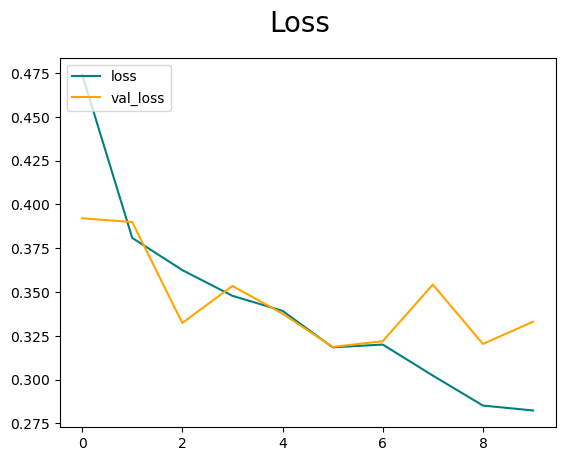

In [136]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

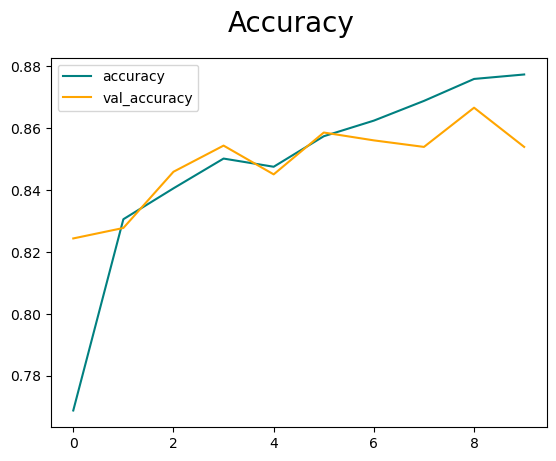

In [137]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [138]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [139]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [140]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 52ms/step


In [141]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8891050815582275, Recall:0.8219424486160278, Accuracy:0.8682432174682617


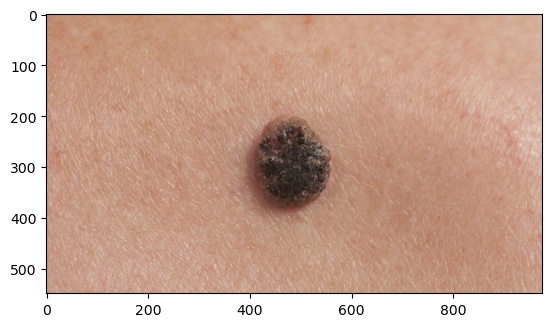

In [143]:
img = cv2.imread('malignant.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

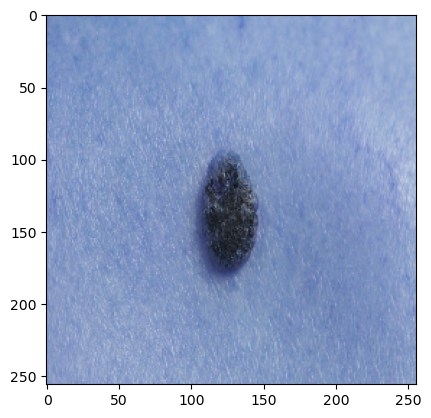

In [145]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [146]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


In [147]:
yhat

array([[0.61488134]], dtype=float32)

In [148]:
if yhat > 0.5:
    print("Predicted class is Malignant")
else:
    print("Predicted class is Benign")

Predicted class is Malignant


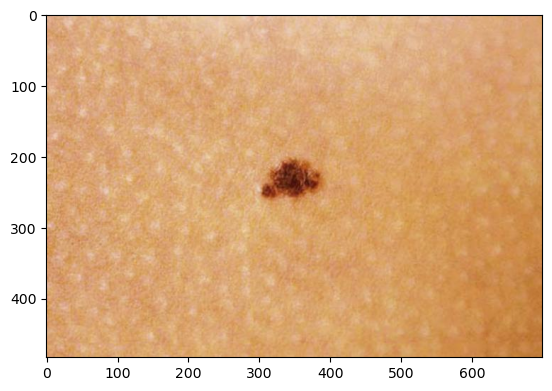

In [149]:
img = cv2.imread('benign.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

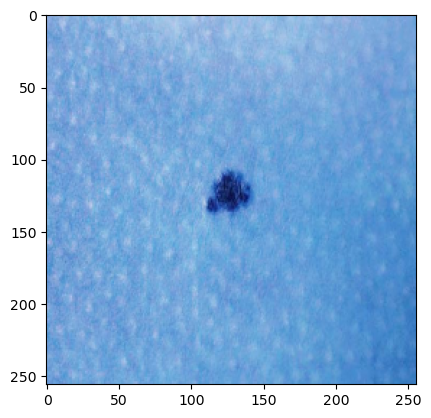

In [158]:
resize1 = tf.image.resize(img, (256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [151]:
yhat1 = model.predict(np.expand_dims(resize1/255, 0))

1/1 [==============================] - 0s 22ms/step


In [153]:
if yhat1 > 0.5:
    print("Predicted class is Malignant")
else:
    print("Predicted class is Benign")

Predicted class is Benign


In [154]:
from tensorflow.keras.models import load_model

In [155]:
model.save(os.path.join(r'C:\Users\jacob\Desktop\Deep Learning Models\Melanoma Classification\Models', 'melanoma_model.h5'))

C:\Users\jacob\Documents\anaconda3 distribution\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [156]:
new_model = load_model(os.path.join(r'C:\Users\jacob\Desktop\Deep Learning Models\Melanoma Classification\Models', 'melanoma_model.h5'))

In [157]:
new_model

In [159]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [161]:
if yhat > 0.5:
    print("Predicted class is Malignant")
else:
    print("Predicted class is Benign")

Predicted class is Malignant
